In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import seaborn as sns

In [4]:
df = pd.read_csv('australian_postcodes.csv')


In [5]:
df.head()

,id,postcode,locality,state,long,lat,dc,type,status,sa3,...,MMM_2015,MMM_2019,ced,altitude,chargezone,phn_code,phn_name,lgaregion,electorate,electoraterating
0,230,200,ANU,ACT,149.11900,-35.277700,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,N2,NaN,NaN,NaN,Durack,NaN
1,21820,200,Australian National University,ACT,149.11890,-35.277700,NaN,NaN,Added 19-Jan-2020,NaN,...,1.0,1.0,NaN,NaN,N2,NaN,NaN,NaN,Durack,NaN
2,232,800,DARWIN,NT,130.83668,-12.458684,NaN,NaN,Updated 6-Feb-2020,70101.0,...,2.0,2.0,NaN,NaN,NT1,PHN701,Northern Territory,Darwin,Solomon,Inner Metropolitan
3,24049,800,DARWIN CITY,NT,130.83668,-12.458684,NaN,NaN,Updated 6-Feb-2020,70101.0,...,2.0,2.0,NaN,NaN,NT1,PHN701,Northern Territory,Darwin,Solomon,Inner Metropolitan
4,233,801,DARWIN,NT,130.83668,-12.458684,NaN,NaN,Updated 25-Mar-2020 SA3,70101.0,...,2.0,2.0,NaN,NaN,NT1,PHN701,NaN,NaN,Lingiari,Rural


In [6]:
dataLat = {}
dataLon = {}
for index, row in df.iterrows():
    if row['state'] == 'NSW':
        dataLat[row['postcode']] = row['lat']
        dataLon[row['postcode']] = row['long']
dataLat


{1001: -33.794883,
 1002: -33.794883,
 1003: -33.794883,
 1004: -33.794883,
 1005: -33.794883,
 1006: -33.794883,
 1007: -33.794883,
 1008: -33.794883,
 1009: -33.794883,
 1010: -33.794883,
 1020: -33.794883,
 1021: -33.794883,
 1022: -33.794883,
 1023: -33.794883,
 1025: -33.794883,
 1026: -33.794883,
 1027: -33.794883,
 1028: -33.794883,
 1029: -33.794883,
 1030: -33.794883,
 1031: -33.794883,
 1032: -33.662834,
 1033: -33.794883,
 1034: -33.794883,
 1035: -33.794883,
 1036: -33.794883,
 1037: -33.794883,
 1038: -33.794883,
 1039: -33.794883,
 1040: -33.794883,
 1041: -33.794883,
 1042: -33.794883,
 1043: -33.794883,
 1044: -33.794883,
 1045: -33.794883,
 1046: -33.794883,
 1100: -33.794883,
 1101: -33.794883,
 1105: -33.794883,
 1106: -33.794883,
 1107: -33.794883,
 1108: -33.794883,
 1109: -33.794883,
 1110: -33.794883,
 1112: -33.794883,
 1113: -33.794883,
 1114: -33.794883,
 1115: -33.794883,
 1116: -33.666729,
 1117: -33.664575,
 1118: -33.794883,
 1119: -33.794883,
 1120: -33.7

In [7]:
dataLat[2134],dataLon[2134]

(-33.880049, 151.101757)

In [8]:
df2 = pd.read_csv('cases_locations.csv')
df2['sum'] = 1
df2.head()

,notification_date,postcode,lhd_2010_code,lhd_2010_name,lga_code19,lga_name19,sum
0,2020-01-25,2134,X700,Sydney,11300,Burwood (A),1
1,2020-01-25,2121,X760,Northern Sydney,16260,Parramatta (C),1
2,2020-01-25,2071,X760,Northern Sydney,14500,Ku-ring-gai (A),1
3,2020-01-27,2033,X720,South Eastern Sydney,16550,Randwick (C),1
4,2020-03-01,2077,X760,Northern Sydney,14000,Hornsby (A),1


In [9]:
df2 = df2.groupby(['notification_date', 'postcode']).agg({'sum':'sum'}).reset_index()
df2 = df2[df2.astype(str).ne('None').all(1)]
df2['postcode'] = df2['postcode'].astype(float).astype(int)
df2.head()
# len(df2)

,notification_date,postcode,sum
0,2020-01-25,2071,1
1,2020-01-25,2121,1
2,2020-01-25,2134,1
3,2020-01-27,2033,1
4,2020-03-01,2077,1


In [10]:
df2['lat'] = df2['postcode'].map(dataLat)
df2['lon'] = df2['postcode'].map(dataLon)
df2 = df2.dropna()
df2

,notification_date,postcode,sum,lat,lon
0,2020-01-25,2071,1,-33.761834,151.171738
1,2020-01-25,2121,1,-33.774145,151.079919
2,2020-01-25,2134,1,-33.880049,151.101757
3,2020-01-27,2033,1,-33.911390,151.218435
4,2020-03-01,2077,1,-33.691922,151.097508
...,...,...,...,...,...
51720,2022-02-07,2869,1,-32.584028,148.266655
51721,2022-02-07,2870,16,-33.035496,148.168190
51722,2022-02-07,2871,3,-33.476768,147.811688
51723,2022-02-07,2873,1,-32.269414,147.260419


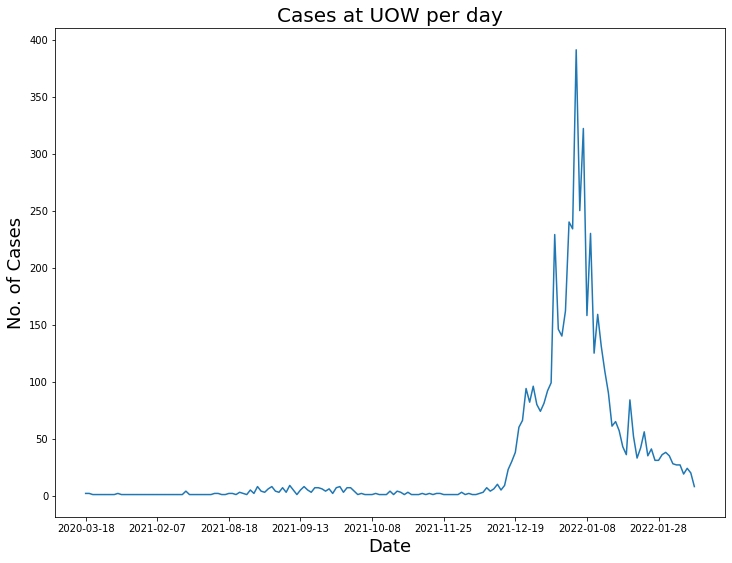

In [16]:
import csv
writer = csv.writer(open("cases2.csv", "w", newline=""), delimiter=",")
header = ['date', 'cases']
writer.writerow(header)
# Create graph of cases at the UOW postcode
dates = []
cases = []
for id, i in df2.iterrows():
    if i['postcode'] == 2000:
        # print(i['notification_date'], "number", i['sum'])
        dates.append(i['notification_date'])
        cases.append(i['sum'])
        writer.writerow([i['notification_date'],i['sum']])

# fig, ax = plt.subplots()
fig = plt.figure(figsize=(12,9))
plt.plot(dates, cases)
plt.title('Cases at UOW per day', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('No. of Cases', fontsize=18)
plt.xticks(np.arange(0, len(dates)+1, 20))
plt.show()

In [12]:
import livepopulartimes
import json

places = ["Ernest by Hemingway",
"Panizzi",
"Piccolo Me",
"Rush Cedar's Courtyard",
"UOW Subway",
"Ugly Duckling",
"UOW UniBar",
"Rush",
"UOW Unishop",
"Yogabar",
"Zambrero", 
"Australia Post - Wollongong University LPO",
"UOW Library",
"UniActive",
"UOW IGA",
"Early Start Discovery Space",
"Wollongong Botanic Garden",
"Cleaver and Co Quality Meats",
"Woonona Pizza Kitchen",
"Chimichangas Bulli"
]

UOW_popularTimes = {} 

for i in places:
    data = livepopulartimes.get_populartimes_by_address(i + " Keiraville NSW")
    
    if 'populartimes' in data:
        if data['populartimes'] != None:
            if 'popular_times' in data:
                if data['popular_times'] != None:
                    UOW_popularTimes[i] = {
                        'Monday': None,
                        'Tuesday': None,
                        'Wednesday': None,
                        'Thursday': None,
                        'Friday': None,
                        'Saturday': None,
                        'Sunday': None
                    }
                    for j in data['populartimes']:
                        UOW_popularTimes[i][j['name']] = j['data']

for i in UOW_popularTimes:
    print(i)
    print(UOW_popularTimes[i])

# Send data into file:
json.dump( UOW_popularTimes, open( "UOW_popularTimes.json", 'w' ) )



Ernest by Hemingway
{'Monday': [0, 0, 0, 0, 0, 0, 0, 13, 33, 36, 35, 47, 54, 43, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Tuesday': [0, 0, 0, 0, 0, 0, 0, 14, 57, 77, 70, 83, 92, 81, 55, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Wednesday': [0, 0, 0, 0, 0, 0, 0, 18, 47, 32, 55, 74, 79, 66, 44, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Thursday': [0, 0, 0, 0, 0, 0, 0, 48, 64, 45, 72, 100, 100, 72, 37, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Friday': [0, 0, 0, 0, 0, 0, 0, 17, 29, 37, 44, 53, 54, 41, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Saturday': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Sunday': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
Panizzi
{'Monday': [0, 0, 0, 0, 0, 0, 0, 0, 10, 28, 47, 57, 54, 50, 42, 24, 12, 10, 0, 0, 0, 0, 0, 0], 'Tuesday': [0, 0, 0, 0, 0, 0, 0, 0, 19, 38, 66, 91, 100, 89, 63, 36, 19, 8, 5, 3, 0, 0, 0, 0], 'Wednesday': [0, 0, 0, 0, 0, 0, 0, 0, 26, 61, 54, 57, 70, 63, 43, 26, 17, 14, 12, 8, 0, 0, 0, 0], 'Thursday': [0, 0, 0, 0, 0, 0, 0, 0, 36, 78, 

In [13]:
import json

# Read data from file:
UOW_popularTimes = json.load( open( "UOW_popularTimes.json" ) )

for key, value in UOW_popularTimes.items() :
    print(key)

Ernest by Hemingway
Panizzi
Rush Cedar's Courtyard
Ugly Duckling
UOW UniBar
UOW Library
UniActive
UOW IGA
Early Start Discovery Space
Wollongong Botanic Garden
Cleaver and Co Quality Meats
Woonona Pizza Kitchen
Chimichangas Bulli


In [14]:
print(UOW_popularTimes['UOW Library']['Thursday'][19])

11


In [15]:
import livepopulartimes
data = livepopulartimes.get_populartimes_by_address("chimichangas bulli NSW")
print(data)

{'rating': 3.9, 'rating_n': 142, 'populartimes': [{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, {'name': 'Tuesday', 'data': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}, {'name': 'Wednesday', 'data': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 24, 40, 38, 19, 0, 0]}, {'name': 'Thursday', 'data': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 41, 50, 42, 25, 0, 0]}, {'name': 'Friday', 'data': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 53, 65, 51, 25, 0, 0]}, {'name': 'Saturday', 'data': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 36, 72, 100, 91, 54, 0, 0]}, {'name': 'Sunday', 'data': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 70, 62, 33, 10, 0, 0]}], 'time_spent': [60, 120], 'name': 'Chimichangas', 'place_id': 'ChIJR25vE4YfE2sRuawOVDwhDIw', 'address': '323 Princes Hwy, Bulli NSW 2516', 'coordinates': {'lat': -34.3385398, 'lng': 150.9097434}, 'categ